In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('C:/Users/Shalini Maurya/Desktop/dataset/Advertising.csv')
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
# as the unnamed column has same value as index numbers, we can drop it
data=data.drop('Unnamed: 0',axis=1)
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# EDA

In [4]:
ds=data.copy()

In [5]:
ds.shape

(200, 4)

In [6]:
#now lets check if there is any null value
ds.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
ds['sales'].unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

In [9]:
ds.loc[ds['sales']==' ']

,TV,radio,newspaper,sales


In [10]:
ds.loc[ds['newspaper']==' ']

,TV,radio,newspaper,sales


In [12]:
ds.loc[ds['TV']==' ']

,TV,radio,newspaper,sales


In [16]:
ds.loc[ds['radio']==' ']

,TV,radio,newspaper,sales


In [17]:
ds['sales'].value_counts()

9.7     5
11.7    4
12.9    4
15.9    4
20.7    3
       ..
17.0    1
18.3    1
22.3    1
14.0    1
25.5    1
Name: sales, Length: 121, dtype: int64

In [18]:
ds.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Univariate Analysis

<AxesSubplot:xlabel='TV', ylabel='Density'>

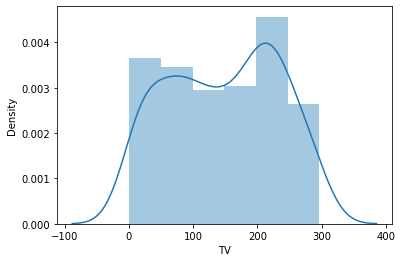

In [19]:
sns.distplot(ds['TV'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

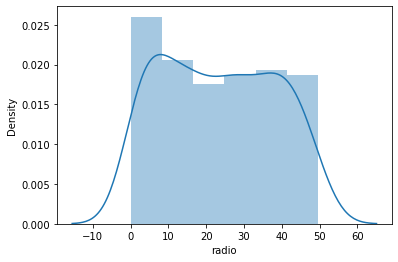

In [20]:
sns.distplot(ds['radio'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

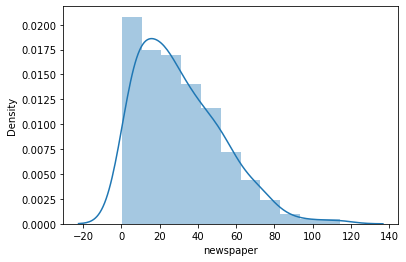

In [23]:
sns.distplot(ds['newspaper'])

<AxesSubplot:xlabel='sales', ylabel='Density'>

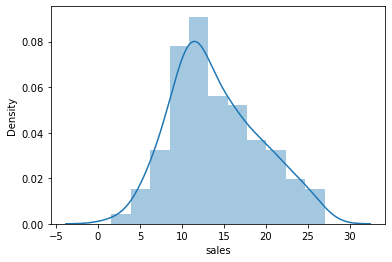

In [26]:
sns.distplot(ds['sales'])

# Bivariate Analysis

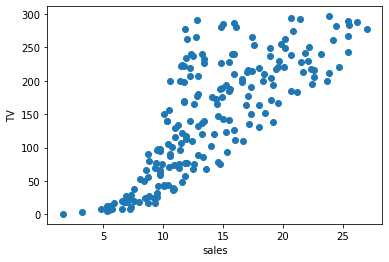

In [29]:
plt.scatter(ds['sales'],ds['TV'])
plt.xlabel("sales")
plt.ylabel('TV')
plt.show()

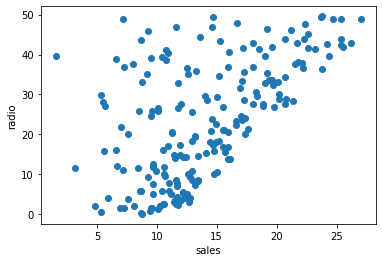

In [31]:
plt.scatter(ds['sales'],ds['radio'])
plt.xlabel("sales")
plt.ylabel('radio')
plt.show()

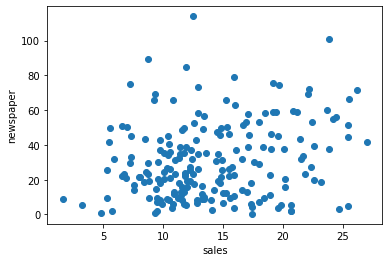

In [33]:
plt.scatter(ds['sales'],ds['newspaper'])
plt.xlabel("sales")
plt.ylabel('newspaper')
plt.show()

# Multivariate Analysis

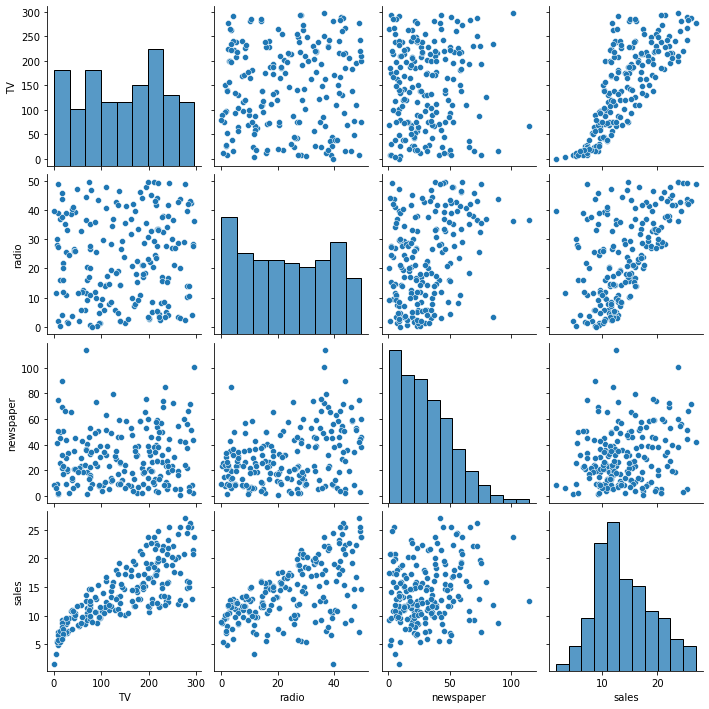

In [36]:
sns.pairplot(ds)

In [37]:
ds.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

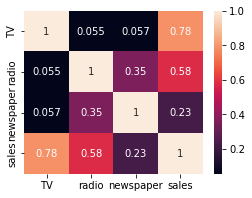

In [40]:
#ploting heatmap using correlation
plt.figure(figsize=(4,3))
sns.heatmap(ds.corr(),annot=True)

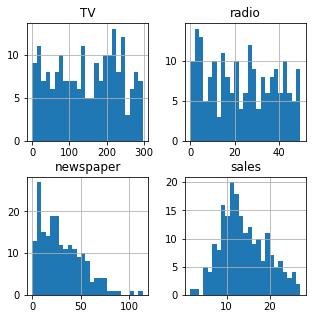

In [42]:
ds.hist(bins=25,figsize=(5,5))
plt.show()

# Checking for outliers

<AxesSubplot:xlabel='TV'>

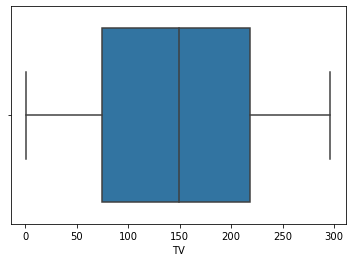

In [43]:
sns.boxplot(ds['TV'])

<AxesSubplot:xlabel='radio'>

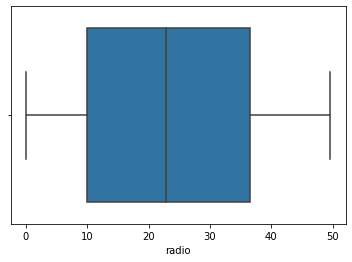

In [45]:
sns.boxplot(ds['radio'])

<AxesSubplot:xlabel='newspaper'>

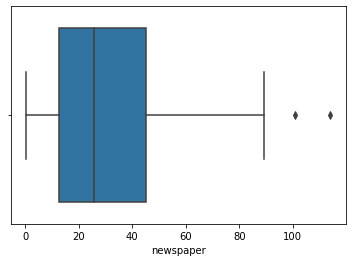

In [47]:
sns.boxplot(ds['newspaper'])

<AxesSubplot:xlabel='sales'>

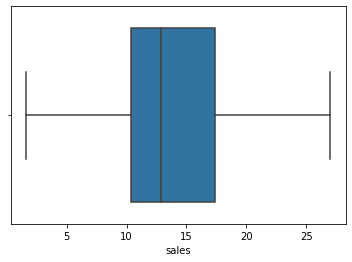

In [49]:
sns.boxplot(ds['sales'])

# Skewness

In [50]:
ds.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [54]:
ds['newspaper']=np.sqrt(ds['newspaper'])
ds.skew()

TV          -0.069853
radio        0.094175
newspaper   -0.776828
sales        0.407571
dtype: float64

# Spliting the data in train and test

In [55]:
x=ds.drop('sales',axis=1)
x

,TV,radio,newspaper
0,230.1,37.8,1.698296
1,44.5,39.3,1.609801
2,17.2,45.9,1.698602
3,151.5,41.3,1.663009
4,180.8,10.8,1.662653
...,...,...,...
195,38.2,3.7,1.388305
196,94.2,4.9,1.298855
197,177.0,9.3,1.261167
198,283.6,42.0,1.688913


In [56]:
y=ds['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

# Scaling using MinMaxScaler

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
mms=MinMaxScaler()

In [65]:
x['TV']=mms.fit_transform(x['TV'].values.reshape(-1,1))
x['radio']=mms.fit_transform(x['radio'].values.reshape(-1,1))
x['newspaper']=mms.fit_transform(x['newspaper'].values.reshape(-1,1))
x
                          

,TV,radio,newspaper
0,0.775786,0.762097,0.884575
1,0.148123,0.792339,0.791163
2,0.055800,0.925403,0.884899
3,0.509976,0.832661,0.847328
4,0.609063,0.217742,0.846952
...,...,...,...
195,0.126818,0.074597,0.557362
196,0.316199,0.098790,0.462942
197,0.596212,0.187500,0.423159
198,0.956713,0.846774,0.874671


# Finding the best random state

In [68]:
maxacc=0
maxrs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2_sc=r2_score(y_test,pred)
    if r2_sc>maxacc:
        maxacc=r2_sc
        maxrs=i
print('best r2_sc is:',maxacc,' at random state', maxrs)

best r2_sc is: 0.9406505154794715  at random state 139


In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=139)

In [71]:
x_train.shape

(150, 3)

In [72]:
y_train.shape

(150,)

In [73]:
x_test.shape

(50, 3)

In [74]:
y_test.shape

(50,)

# Model Training

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [76]:
lr=LinearRegression()

In [80]:
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print(r2_score(y_test,predlr))
print(mean_squared_error(y_test,predlr))
score=cross_val_score(lr,x,y,cv=10)
print(score.mean())

0.9406505154794715
1.846924859148958
0.8858710551286221


# Regularization

In [82]:
lassocv=LassoCV(alphas=None,cv=10,max_iter=100,normalize=True)
lassocv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=100, normalize=True)

In [84]:
alpha=lassocv.alpha_
alpha

0.006161291599296168

In [86]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.006161291599296168)

In [88]:
lasso_reg.score(x_test,y_test)

0.9393602110589269

In [90]:
alpha=np.random.uniform(low=0,high=10,size=(50,))

In [100]:
ridgecv=RidgeCV(alphas=alpha,cv=10,normalize=True)
ridgecv.fit(x_train,y_train)
print(ridgecv.alpha_)

0.8758872324005751


In [101]:
ridge_reg=Ridge(alpha=ridgecv.alpha_)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.8758872324005751)

In [102]:
ridge_reg.score(x_test,y_test)

0.923069874755696

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
rfr=RandomForestRegressor()

In [106]:
rfr.fit(x_train,y_train)
predrf=rfr.predict(x_test)
print(r2_score(y_test,predrf))
print(mean_squared_error(y_test,predrf))
score=cross_val_score(rfr,x,y,cv=10)
print(score.mean())

0.9753174873510082
0.768106859999998
0.9787880297892446


In [107]:
from sklearn.svm import SVR

In [108]:
sv=SVR()
sv.fit(x_train,y_train)
predsv=sv.predict(x_test)
print(r2_score(y_test,predsv))
print(mean_squared_error(y_test,predsv))
cvscore=cross_val_score(sv,x,y,cv=10)
print(cvscore.mean())

0.8904977755957905
3.4076518442934134
0.9305024472656751


In [110]:
from sklearn.ensemble import AdaBoostRegressor
adr=AdaBoostRegressor()

In [111]:
adr.fit(x_train,y_train)
predad=adr.predict(x_test)
print(r2_score(y_test,predad))
print(mean_squared_error(y_test,predad))
cvscore=cross_val_score(adr,x,y,cv=10)
print(cvscore.mean())

0.9541765761883502
1.4260009375444647
0.9566117020232697


# Hyper Parameter Tunning

In [114]:
# for svr

parameter={'kernel':['linear','poly','rbf','sigmoid'],'gamma':['auto','scale']}
gcv=GridSearchCV(sv,parameter,cv=5)
gcv.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [115]:
gcv.best_params_

{'gamma': 'scale', 'kernel': 'rbf'}

In [116]:
gcv.best_score_

0.9094122288264541

In [121]:
svr=SVR(kernel='rbf',gamma='scale')
svr.fit(x_train,y_train)
predsvr=svr.predict(x_test)
print(r2_score(y_test,predsvr))
print(mean_squared_error(y_test,predsvr))

0.8904977755957905
3.4076518442934134


In [123]:
# for random forest regressor

parameter={'n_estimators':(100,150,200),'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}

gcv=GridSearchCV(rfr,parameter,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': (100, 150, 200)})

In [124]:
gcv.best_params_

{'criterion': 'mae', 'max_features': 'auto', 'n_estimators': 150}

In [125]:
gcv.best_score_

0.9617790962710584

In [127]:
rfr=RandomForestRegressor(n_estimators=200,criterion='mae',max_features='auto')
rfr.fit(x_train,y_train)
predrf=rfr.predict(x_test)
print(r2_score(y_test,predrf))
print(mean_squared_error(y_test,predrf))

0.9755222430480509
0.7617349700000118


In [128]:
# for adaboost regressor

parameter={'n_estimators':(50,100,150,200),'learning_rate':[0.0001,0.001,0.01,0.1,1.0]}

gcv=GridSearchCV(adr,parameter,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'n_estimators': (50, 100, 150, 200)})

In [129]:
gcv.best_params_

{'learning_rate': 1.0, 'n_estimators': 100}

In [130]:
gcv.best_score_

0.9466201301399844

In [132]:
adr=AdaBoostRegressor(n_estimators=150,learning_rate=1.0)
adr.fit(x_train,y_train)
predad=adr.predict(x_test)
print(r2_score(y_test,predad))
print(mean_squared_error(y_test,predad))

0.9538870483024633
1.4350108936406527


# Final Model

In [134]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(r2_score(y_test,predrf))
print(mean_squared_error(y_test,predrf))

0.9739862207191408
0.8095351799999949


# Saving our Final Model

In [135]:
import joblib

In [136]:
joblib.dump(rf,'sales_channel_rf.obj')

['sales_channel_rf.obj']